# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# My Project

## Research Question

What is the relevance over time of the top 3 religions in the USA, compared to the world?

## Data Sources

- [Global data](https://www.kaggle.com/umichigan/world-religions?select=global.csv)
- [National data](https://www.kaggle.com/umichigan/world-religions?select=national.csv)



In [1]:
######################
## Import Libraries ##
######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set notebook to display plots:
%matplotlib notebook

In [2]:
#####################################
## Data Processing - National data ##
#####################################

## Loading data:
df_national = pd.read_csv("national.csv")


## Filtering desired data:

# Keeping only USA data:
df_national = df_national[df_national["code"]=="USA"]

# Evaluating top religions:
# Transpose to sort:
top = df_national.set_index('year').transpose()
# Drop non numeric content and total value:
top.drop(labels=['code', 'state', 'religion_all'], inplace=True)
# Keep only total values, that is, the ones that end with _all:
top = top.filter(regex='_all$', axis=0)
# Sort to obtain the top 3 religions:
top.sort_values([1980], ascending=False, inplace=True) # descending order
# NOTE: You can change the year value above to see that the top 3 are always the same
# Keeping only top 3 religion data:
top = top.head(3)
# Transpose to make plotting easier:
top = top.transpose()

# Just to visualize:
top.head()

,christianity_all,noreligion_all,judaism_all
year,,,
1945,110265118,22874544,4641182
1950,122994019,22568130,6090837
1955,134001770,23303540,5333332
1960,150234347,21548225,5500000
1965,167515758,19852362,5600000


In [3]:
###################################
## Data Processing - Global data ##
###################################

## Loading data:
df_global = pd.read_csv("global.csv")


## Filtering desired data:

# Set year to index and keep only the top 3 USA religions:
df_global.set_index('year', inplace=True)
df_global = df_global[top.columns]

# Just for visualization:
df_global.head()

,christianity_all,noreligion_all,judaism_all
year,,,
1945,701350290,153486530,12009400
1950,696480122,192925316,13698294
1955,836002102,304128449,12986204
1960,966967595,434629671,13728856
1965,1074713786,474097850,14253679


In [4]:
#######################
## Data for Plotting ##
#######################

# Calculate ratio of US compared to world:
df_ratio = top/df_global
# Format as percentage for better view:
df_ratio *= 100

# Just to visualize:
df_ratio.head()

,christianity_all,noreligion_all,judaism_all
year,,,
1945,15.7218,14.9033,38.6462
1950,17.6594,11.6979,44.4642
1955,16.0289,7.6624,41.0692
1960,15.5366,4.95784,40.0616
1965,15.587,4.1874,39.2881


In [5]:
## Plot to fast data visualization:

df_ratio.plot();

<IPython.core.display.Javascript object>

## Making a Good Visualization

Based on this preliminary visualization, it is easier and faster to ajust the data for a better final representation manually. This is done in the cell below.

<IPython.core.display.Javascript object>


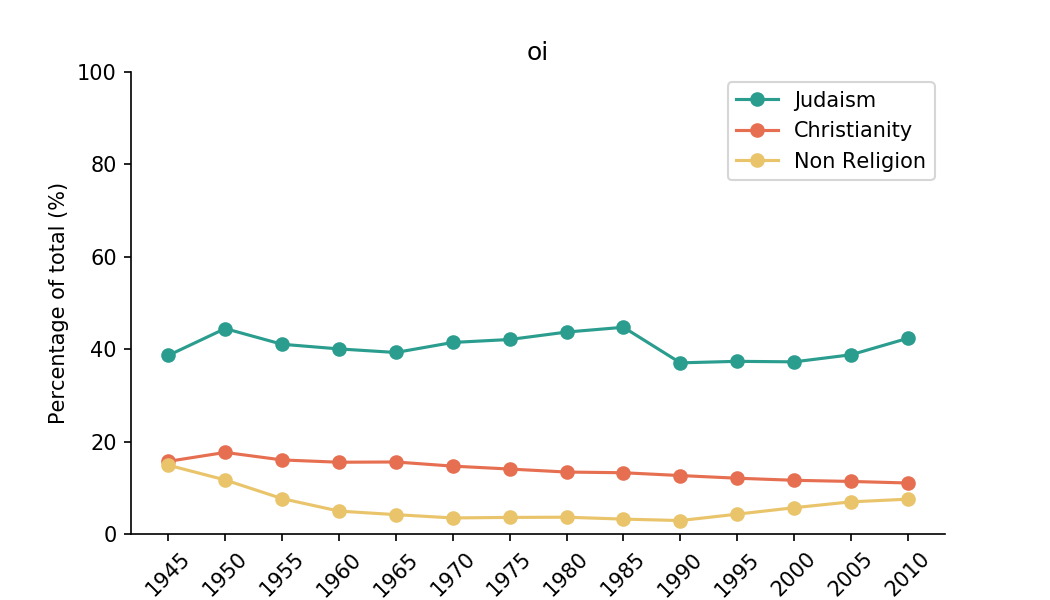

In [7]:
##############################
## Plot Final Visualization ##
##############################

# Rename columns:
df_ratio.rename(columns={'judaism_all': 'Judaism', 'christianity_all': 'Christianity', 'noreligion_all': 'Non Religion'}, inplace=True)
# Rearange columns:
df_ratio = df_ratio[['Judaism', 'Christianity', 'Non Religion']]

# Create figure:
plt.figure(figsize=(7, 4))
# Set y limits:
plt.gca().set_ylim([0,100])

# Define colors in the desired order:
# See this link for some nice color combinations: https://coolors.co/palettes/trending
colors = ['#2A9D8F', '#E76F51', '#E9C46A']

# Loop over religions to make plots:
for i in range(len(colors)):
    plt.plot(df_ratio.index.values, df_ratio[df_ratio.columns[i]], '-o', label=df_ratio.columns[i], color=colors[i])

# Plot min and max values for each line (religion):
#for religion in df_ratio.columns:
 #   plt.gca().text(df_ratio[religion].idxmin(), df_ratio[religion].min()*1.05, str(df_ratio[religion].min()), 
#             ha='center', color="black", fontsize=10)

# Define x axis visual:
plt.xticks(df_ratio.index.values, rotation=45)

# Define y axis visual:
plt.ylabel("Percentage of total (%)")

# Title:
plt.title("oi")
# Legend:
plt.legend()

# Dejunking:
# Remove spines:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Column names for reference: ['christianity_all', 'noreligion_all', 'judaism_all']

# Show plot:
plt.show()